# Flight Price Prediction

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the data

In [3]:
Flight_price = pd.read_csv("C:/Users/deeps/OneDrive/Documents/WEBSTER/DATASET/Excel/Clean_Dataset_Flight.csv")

In [4]:
Flight_price

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs)
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Exploration

In [5]:
Flight_price.shape 

(300153, 12)

In [6]:
Flight_price.head()

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs)
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
Flight_price.columns

Index(['S.No.', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price (in Rs)'],
      dtype='object')

In [8]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   S.No.             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price (in Rs)     300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
Flight_price.duplicated().sum()

0

In [10]:
Flight_price.isnull()

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
Flight_price.isnull().sum()

S.No.               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price (in Rs)       0
dtype: int64

In [12]:
Flight_price.describe()

,S.No.,duration,days_left,price (in Rs)
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [13]:
Flight_price['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

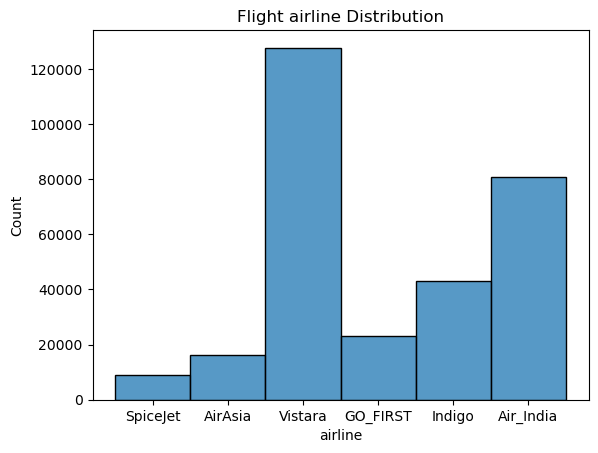

In [14]:
sns.histplot(Flight_price.airline)
plt.title('Flight airline Distribution')
plt.show()

<Axes: xlabel='flight'>

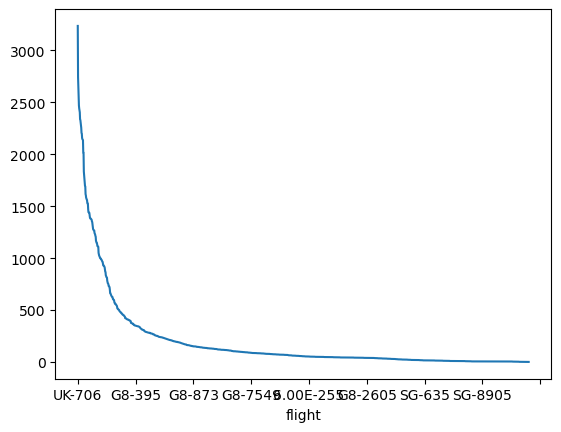

In [15]:
Flight_price['flight'].value_counts().plot()

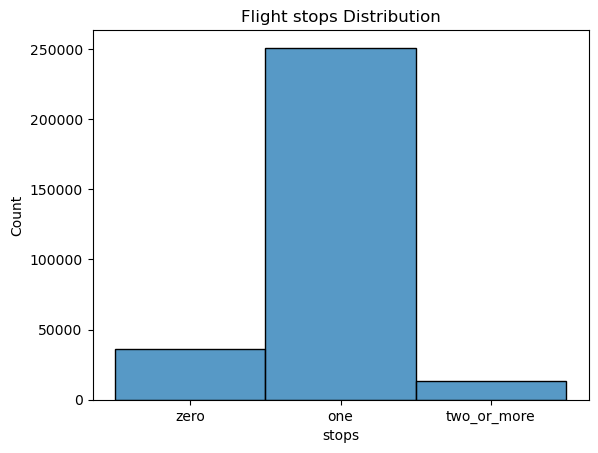

In [16]:
sns.histplot(Flight_price.stops)
plt.title('Flight stops Distribution')
plt.show()

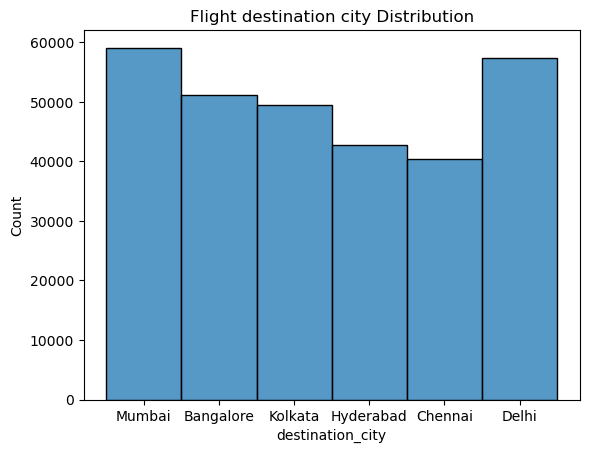

In [17]:
sns.histplot(Flight_price.destination_city)
plt.title('Flight destination city Distribution')
plt.show()

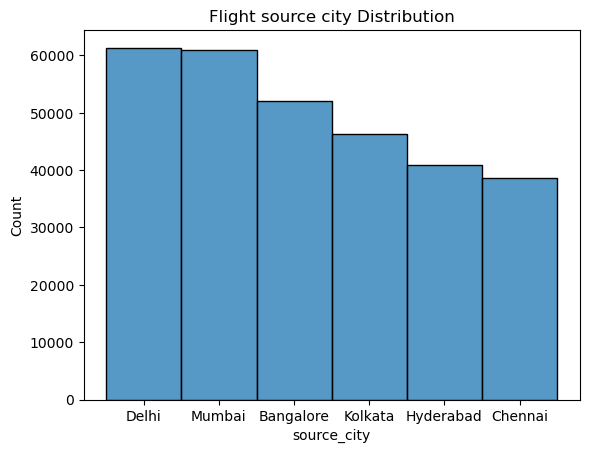

In [18]:
sns.histplot(Flight_price.source_city)
plt.title('Flight source city Distribution')
plt.show()

## Exploratory Data Analysis

In [19]:
compare_airline_price = pd.DataFrame(Flight_price.groupby(['airline','class'])['price (in Rs)'].mean())
compare_airline_price

price (in Rs)
airline   class                  
AirAsia   Economy     4091.072742
Air_India Business   47131.039212
          Economy     7313.682169
GO_FIRST  Economy     5652.007595
Indigo    Economy     5324.216303
SpiceJet  Economy     6179.278881
Vistara   Business   55477.027777
          Economy     7806.943645

<Axes: xlabel='arrival_time', ylabel='price (in Rs)'>

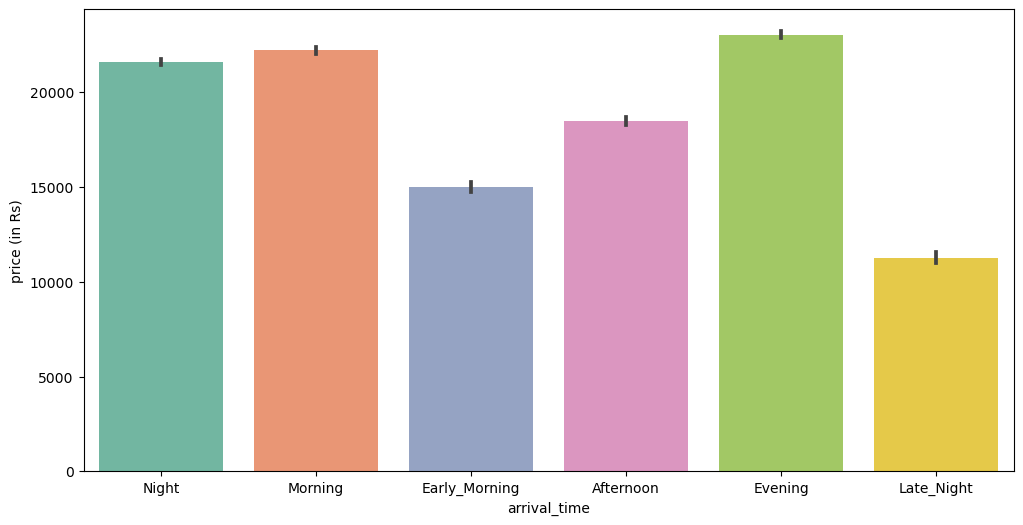

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'arrival_time', y ='price (in Rs)', data = Flight_price, palette = 'Set2')

<Axes: xlabel='departure_time', ylabel='price (in Rs)'>

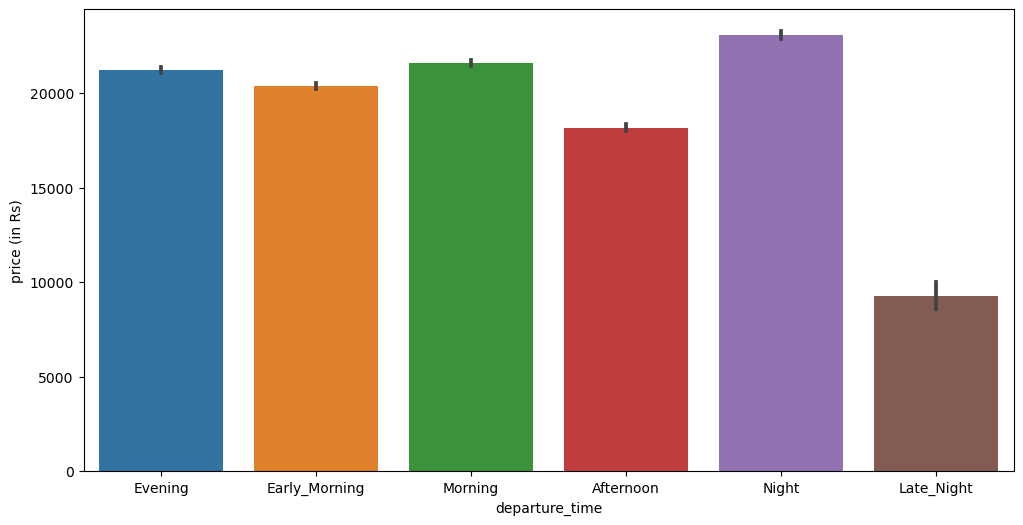

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'departure_time', y ='price (in Rs)', data = Flight_price)

<Axes: xlabel='destination_city', ylabel='price (in Rs)'>

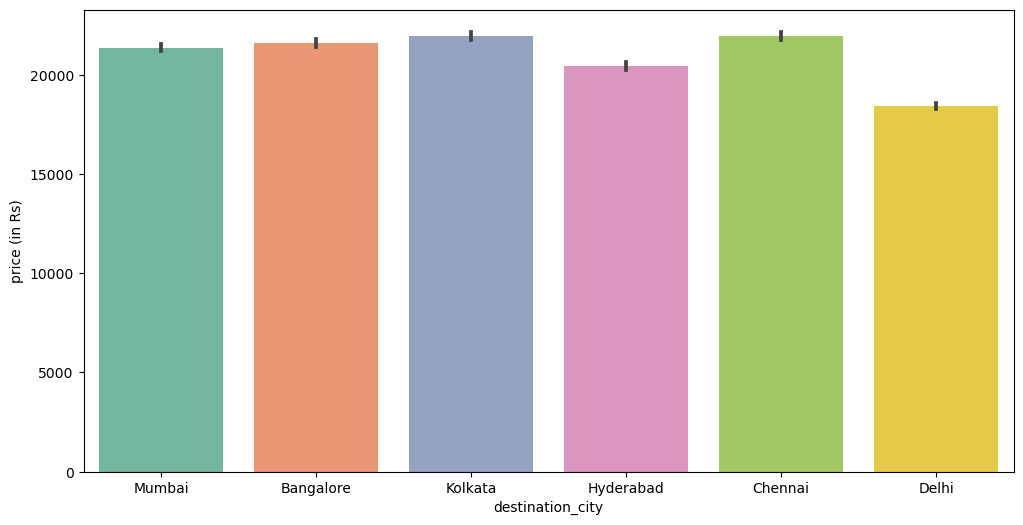

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'destination_city', y ='price (in Rs)', data = Flight_price, palette = 'Set2')

<Axes: xlabel='source_city', ylabel='price (in Rs)'>

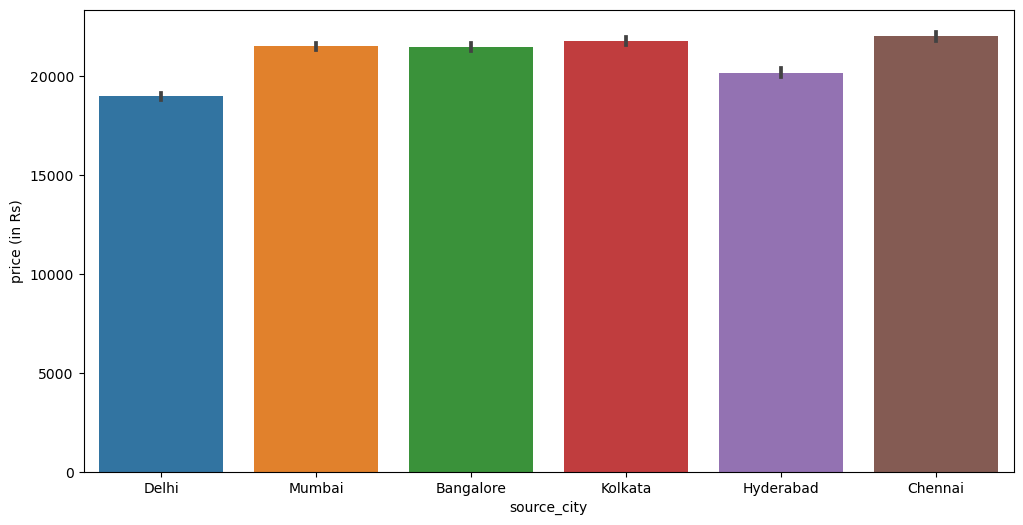

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'source_city', y ='price (in Rs)', data = Flight_price)

<Axes: xlabel='stops', ylabel='price (in Rs)'>

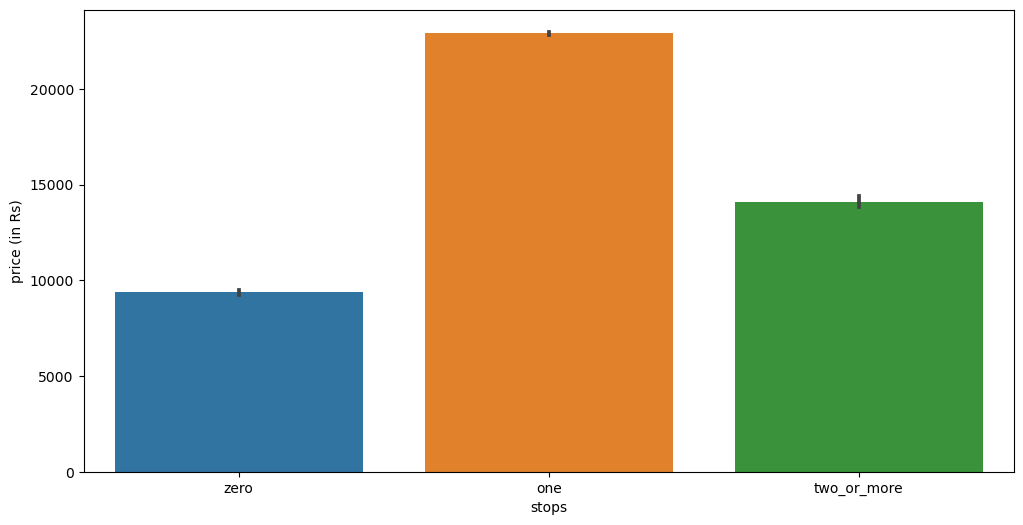

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'stops', y ='price (in Rs)', data = Flight_price)

<Axes: xlabel='airline', ylabel='price (in Rs)'>

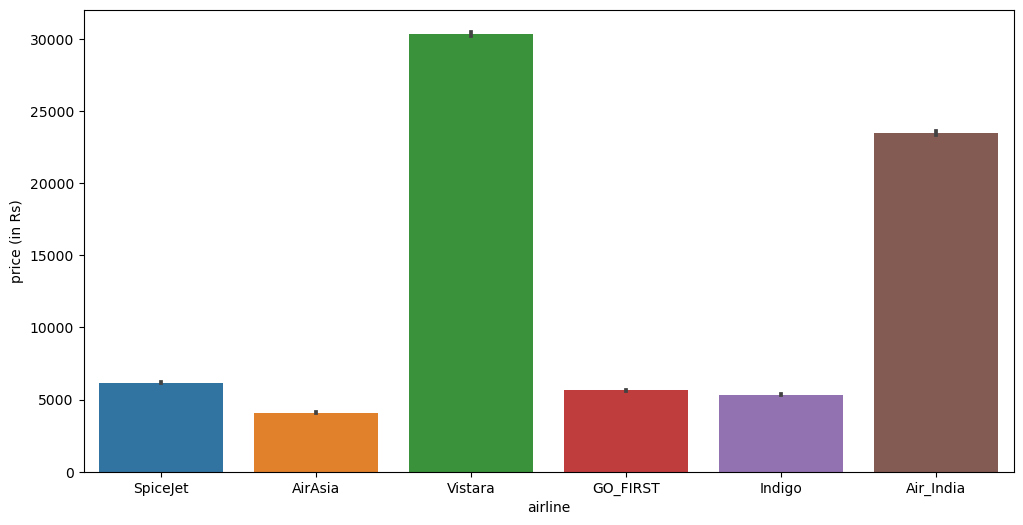

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'airline', y ='price (in Rs)', data = Flight_price)

<Axes: xlabel='class', ylabel='price (in Rs)'>

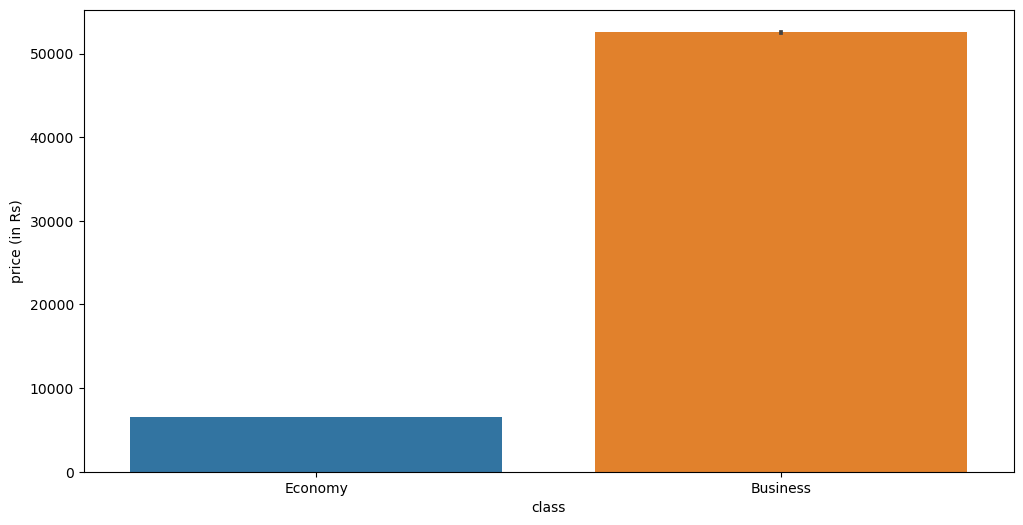

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'class', y ='price (in Rs)', data = Flight_price)

<Axes: xlabel='days_left', ylabel='price (in Rs)'>

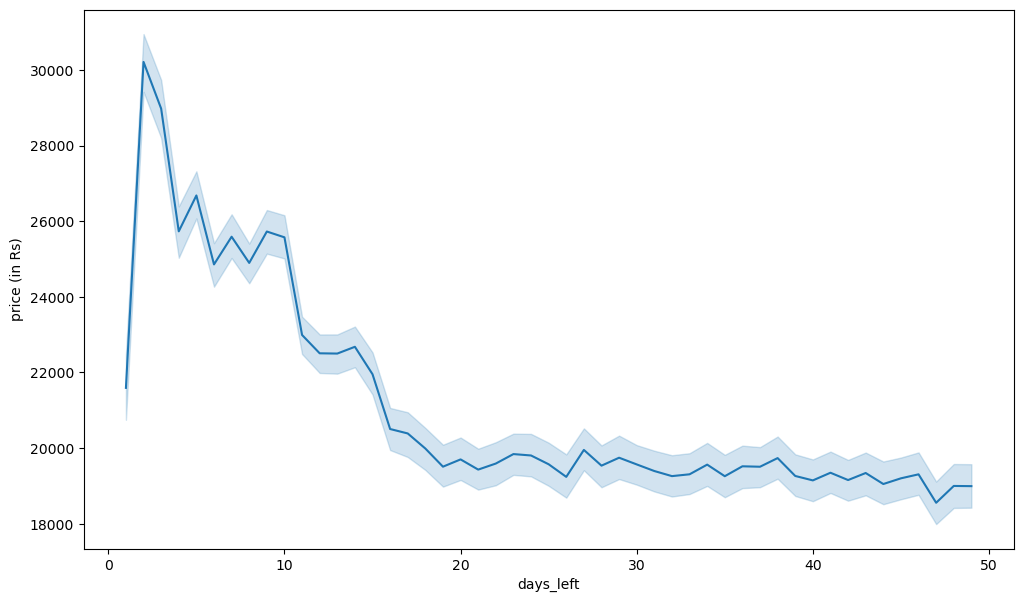

In [27]:
plt.figure(figsize=(12,7))
sns.lineplot(x = 'days_left',y='price (in Rs)',data = Flight_price)

<Axes: xlabel='duration', ylabel='price (in Rs)'>

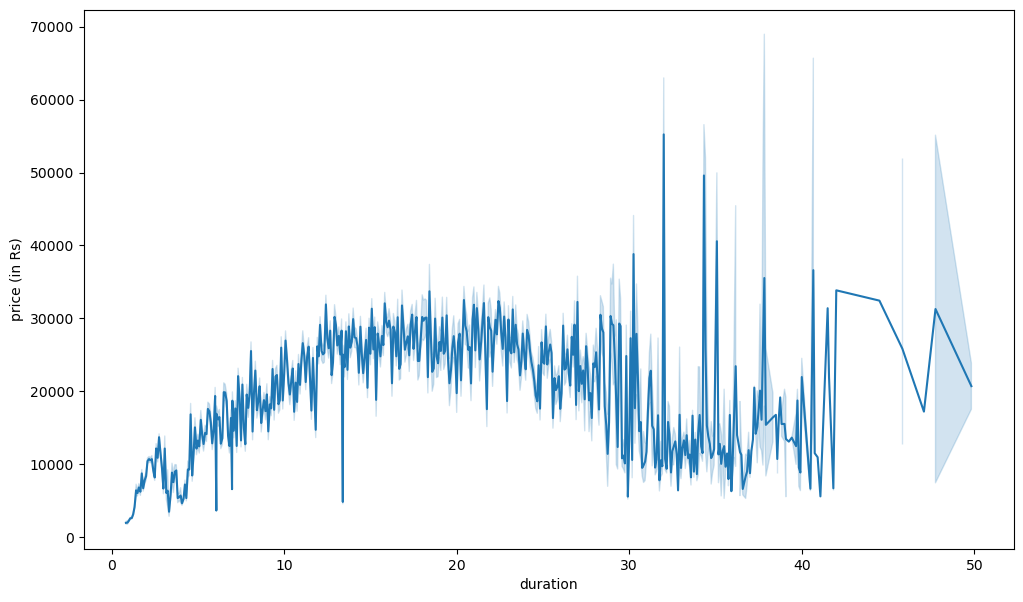

In [28]:
plt.figure(figsize=(12,7))
sns.lineplot(x = 'duration',y='price (in Rs)',data = Flight_price)

## Data Preparation

In [29]:
# Convert class column into binary column
Flight_price['class'] = Flight_price['class'].apply(lambda x: 1 if x=='Business' else 0)
Flight_price.head()

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs)
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955


In [30]:
# Convert stops columns into categorical column
Flight_price['stops'] = Flight_price['stops'].apply(lambda x: 0 if x=='zero' else 1 if x=='one' else 2)
Flight_price

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs)
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [31]:
# Convert stops columns into categorical column
Flight_price.dummies = pd.get_dummies(Flight_price['airline'])
Flight_price.dummies

C:\Users\deeps\AppData\Local\Temp\ipykernel_32516\3180061013.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Flight_price.dummies = pd.get_dummies(Flight_price['airline'])


,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


In [32]:
Flight_price.dummies = Flight_price.dummies.astype(int)
Flight_price.dummies

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


In [33]:
combined = pd.concat([Flight_price,Flight_price.dummies],axis='columns') 
combined

,S.No.,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs),AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1


In [34]:
final_flight = combined.drop(['airline'], axis='columns')
final_flight

,S.No.,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price (in Rs),AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,1,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,2,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,3,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,4,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1
300149,300149,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1
300150,300150,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1
300151,300151,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1


## Model Developmemnt for Flight Price Predicton

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
x = final_flight[['days_left','class','stops','duration','AirAsia','Air_India','GO_FIRST','Indigo','SpiceJet','Vistara']]
y = final_flight['price (in Rs)']

#DATA PARTITIONING
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)


In [36]:
#model fitting
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

In [37]:
linearmodel.predict(X_test)

array([ 8761.21026385,  8774.48079844, 60868.42542522, ...,
       18674.53124244,  2046.91986758, 11389.04591774])

### Model accuracy

In [38]:
linearmodel.score(X_test,y_test)

0.9064216075901539

In [39]:
X_train.head()

,days_left,class,stops,duration,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
22688,16,0,0,2.08,0,0,0,0,0,1
181611,12,0,0,2.83,0,0,0,1,0,0
46295,19,0,1,8.17,0,0,0,1,0,0
186736,44,0,1,27.17,0,0,0,0,1,0
45765,16,0,2,7.83,0,0,1,0,0,0


# Prediction

### 1. What is the price of economy class Indigo flight such that there is only 1 stop, flight duration should be 5 hours and flight after 20days.

In [40]:
linearmodel.predict([[20,0,1,5,0,0,0,1,0,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7526.61198599])

### 2. Predict the price of business class Vistara flight such that there is no stop and flight is after 3days with 3 hours duration flight.

In [41]:
linearmodel.predict([[3,1,0,3,0,0,0,0,0,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50380.95981305])